# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
# from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [47]:
api_key = "e61334b19fef09307be75f8ae2ff82d9"

In [48]:
city = citipy.nearest_city(30.26715, -97.74306)
city
city.city_name 
city.country_code

'us'

In [49]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"
# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e61334b19fef09307be75f8ae2ff82d9&units=imperial&q=London'

In [50]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

weather_json

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 48.4,
  'pressure': 998,
  'humidity': 71,
  'temp_min': 46.4,
  'temp_max': 50},
 'visibility': 10000,
 'wind': {'speed': 19.46, 'deg': 260},
 'clouds': {'all': 68},
 'dt': 1544304000,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0038,
  'country': 'GB',
  'sunrise': 1544255621,
  'sunset': 1544284303},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [37]:
temp = weather_json['main']['temp']
temp

9.11

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)

# lats

lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)

lat_lngs = zip(lats, lngs)

 # Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # print(lat_lng)
     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # print(city)
   # If the city is unique, then add it to a our cities list
     if city not in cities:
       cities.append(city)

 # Print the city count to confirm sufficient count
len(cities)

892

In [52]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_data = []
for city in cities:
#    print(city)
    city_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
#     print(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-pierre,75,FR,1544304600,87,48.95,4.24,51.80,23.04
1,kruisfontein,8,ZA,1544306034,92,-34.00,24.73,61.35,9.64
2,mataura,56,NZ,1544306037,57,-46.19,168.86,69.54,14.90
3,hermanus,68,ZA,1544306031,93,-34.42,19.24,55.99,3.38
4,camopi,64,GF,1544306499,83,3.17,-52.33,77.91,2.48


In [54]:
city_data_df.count()

City          791
Cloudiness    791
Country       791
Date          791
Humidity      791
Lat           791
Lng           791
Max Temp      791
Wind Speed    791
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

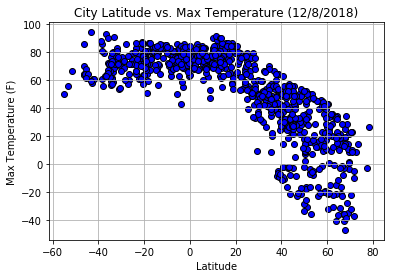

In [69]:
plt.scatter(city_data_df.Lat, city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", )

plt.title("City Latitude vs. Max Temperature (12/8/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("images/max_temp.png")

#### Latitude vs. Humidity Plot

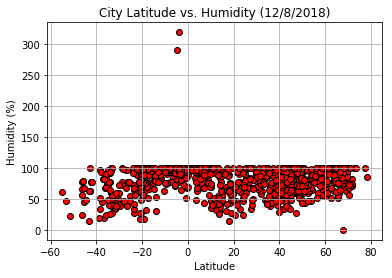

In [70]:
plt.scatter(city_data_df.Lat, city_data_df['Humidity'], marker="o", facecolors="r", edgecolors="black", )

plt.title("City Latitude vs. Humidity (12/8/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig("images/humidity.png")

#### Latitude vs. Cloudiness Plot

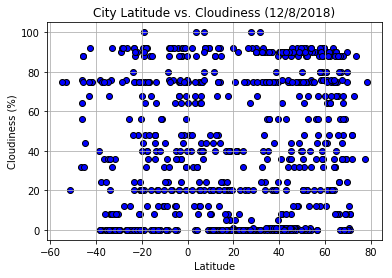

In [71]:
plt.scatter(city_data_df.Lat, city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", )

plt.title("City Latitude vs. Cloudiness (12/8/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig("images/cloudiness.png")

#### Latitude vs. Wind Speed Plot

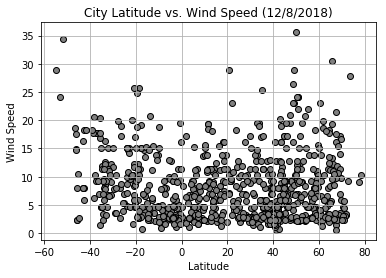

In [72]:
plt.scatter(city_data_df.Lat, city_data_df['Wind Speed'], marker="o", facecolors="grey", edgecolors="black", )

plt.title("City Latitude vs. Wind Speed (12/8/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid()
plt.savefig("images/wind_speed.png")